##Object Prediction (Machine Learning Mode)

**A dataset “object.csv” is provided with five attributes describing some characteristics of an object, belonging either to class “object1” or to class “object2”. We build a classifier(Random Forest and Artificial Neural Network) able to classify an object as belonging to class “object1” or “object2” using the object**.

**NB: This script takes approximatly 15 minutes to finish execution**

###1) Import Dataset

####1.1) Import required Libraries

In [1]:
import numpy as np  #Used for statistical calculations like mode, median, mean etc.
import pandas as pd #Used for dataset processing and dataset wrangling
import matplotlib.pyplot as plt #Used for data visualization
import seaborn as sns #Used for data visualization
import warnings #Used to filter warning messages
warnings.filterwarnings('ignore')

####1.2) Import dataset

In [2]:
dataset=pd.read_csv('object.csv') #Import of dataset in csv format

####1.3) View of the header, footer and checks of dataset

In [3]:
dataset.head()  #View of first 5 rows

,object,attr1,attr2,attr3,attr4,attr5
0,object1,10.12,177.38,189,103,2
1,object1,8.64,154.75,188,100,2
2,object1,9.18,163.56,186,79,2
3,object1,10.04,176.54,186,85,2
4,object1,11.21,191.90,186,80,2


In [4]:
dataset.tail()  #View of last 5 rows

,object,attr1,attr2,attr3,attr4,attr5
9995,object2,10.60,183.14,142,84,46
9996,object2,10.76,186.05,140,74,47
9997,object2,12.01,205.69,133,76,47
9998,object2,11.74,201.98,165,66,48
9999,object2,11.18,193.01,159,70,56


In [5]:
dataset.shape #check for the shape of data


(10000, 6)

In [6]:
dataset.dtypes  #Dataset types of Features(float, int, object or booalean)


object     object
attr1     float64
attr2     float64
attr3       int64
attr4       int64
attr5       int64
dtype: object

In [7]:
dataset #View of both head and tail of dataset

,object,attr1,attr2,attr3,attr4,attr5
0,object1,10.12,177.38,189,103,2
1,object1,8.64,154.75,188,100,2
2,object1,9.18,163.56,186,79,2
3,object1,10.04,176.54,186,85,2
4,object1,11.21,191.90,186,80,2
...,...,...,...,...,...,...
9995,object2,10.60,183.14,142,84,46
9996,object2,10.76,186.05,140,74,47
9997,object2,12.01,205.69,133,76,47
9998,object2,11.74,201.98,165,66,48


In [8]:
print(dataset.isnull().sum()) #Check for missing values (The dataset has no missing data)


object    0
attr1     0
attr2     0
attr3     0
attr4     0
attr5     0
dtype: int64


##2) Exploratory Data Analysis

In [9]:
!pip install sweetviz #Install sweetviz package for Exploratory Data Analysis
import sweetviz as sv

####2.1 Describe dataset and its features

####2.1.1 Key parameters of numerical features

In [10]:
dataset.describe()

,attr1,attr2,attr3,attr4,attr5
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


##### **1) The values of the numerical features are in different scale 2) None of the features have zero values**

###2.1.2 Key parameters of categorical features

In [11]:
dataset['object'].describe()  #Describing the Target variable

count       10000
unique          2
top       object1
freq         5000
Name: object, dtype: object

In [12]:
dataset['object'].value_counts()  #Checking for imbalance class representation of Target Variable

object1    5000
object2    5000
Name: object, dtype: int64

**The Target feature (also only categorical features) has equal data. Thus 5000 observations of object 1 and 5000 observations of object 2**

###2.2) Data visualization and analysis

####2.2.1) Univariate analysis

In [13]:
#Use of sweetviz library for univariate analysis and correlations of variables
#To view the correlation click on the associations tab on the sweetviz display
eda_data=sv.analyze(dataset)


                                             |          | [  0%]   00:00 -> (? left)


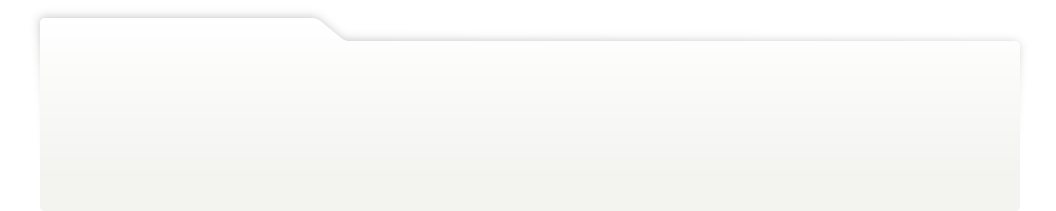
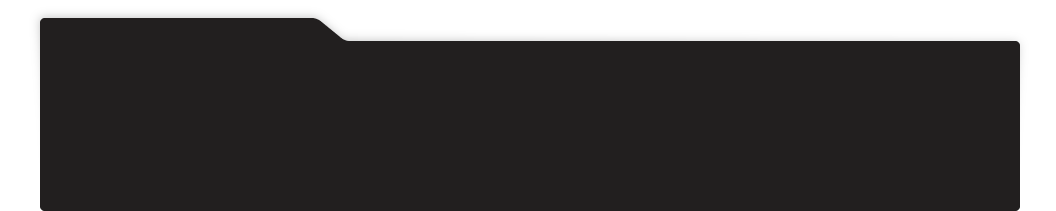
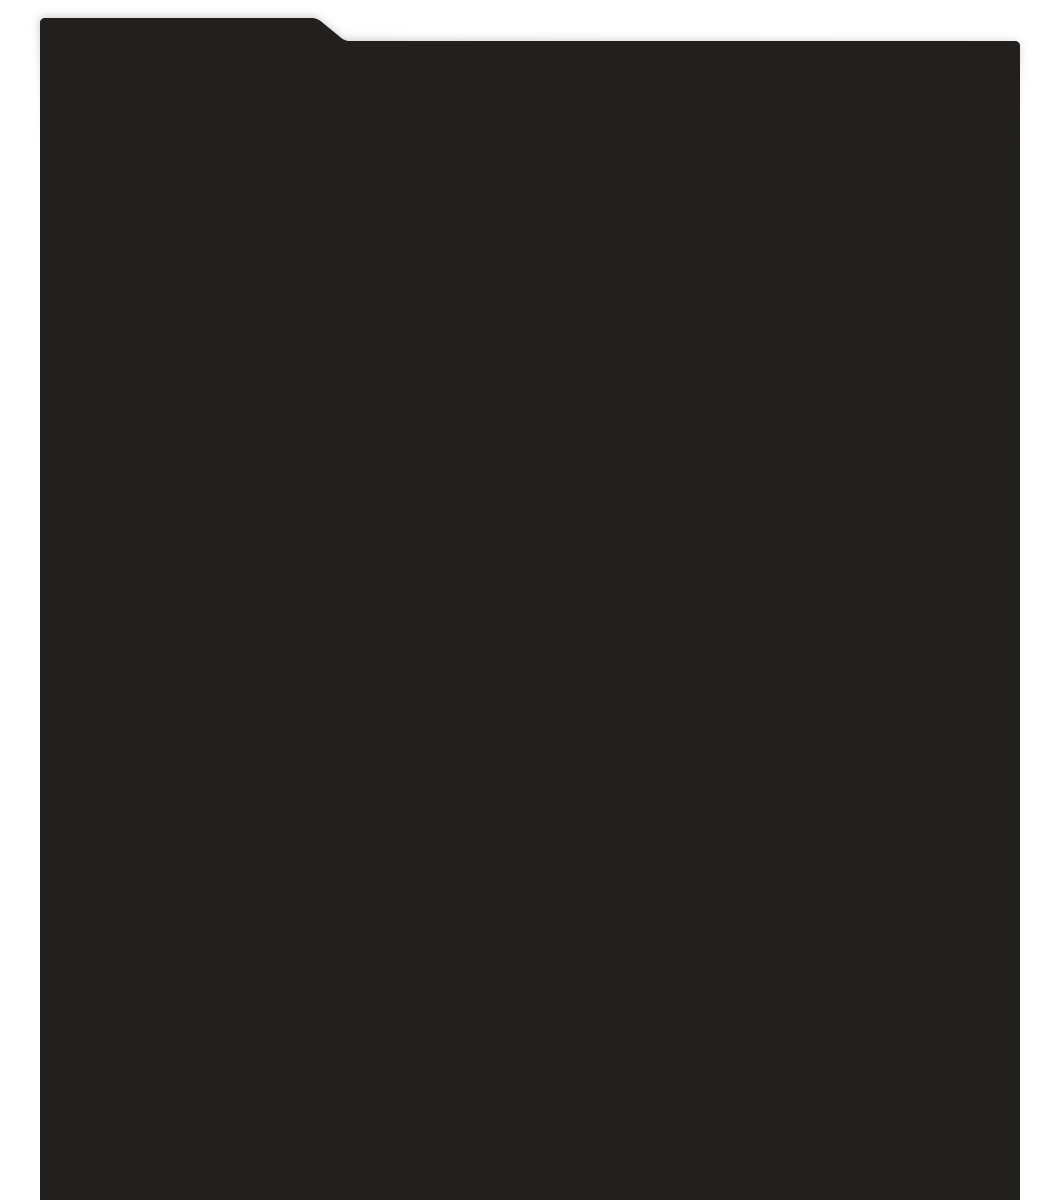
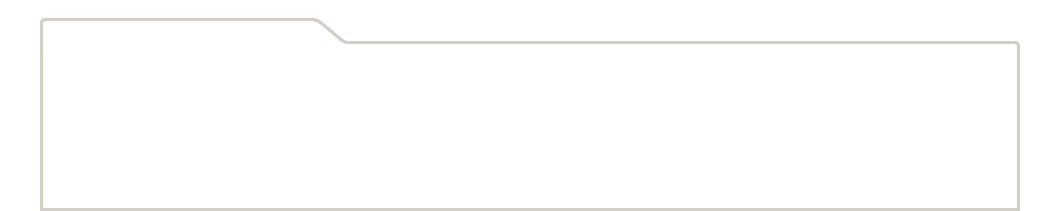
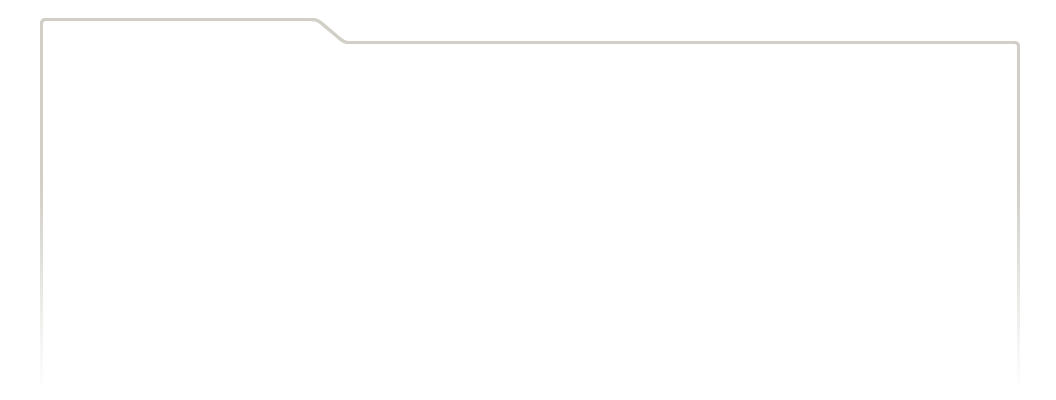
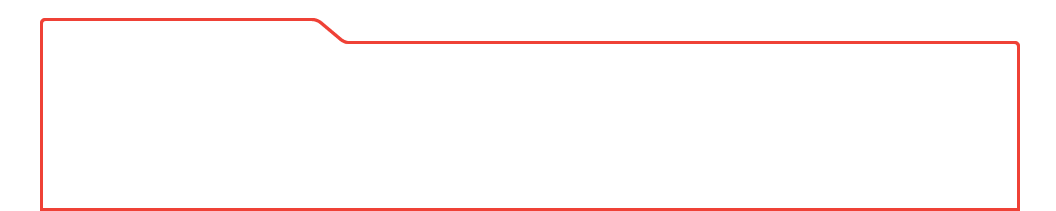
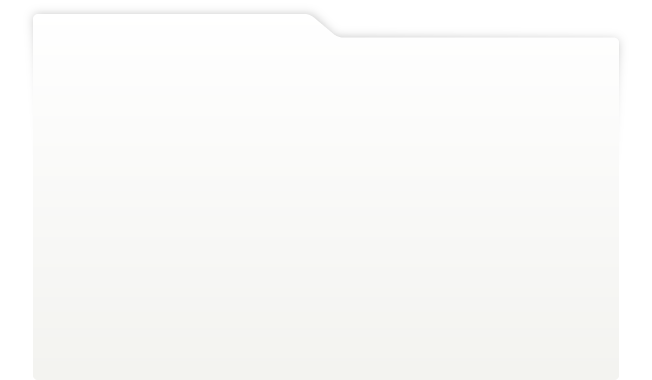
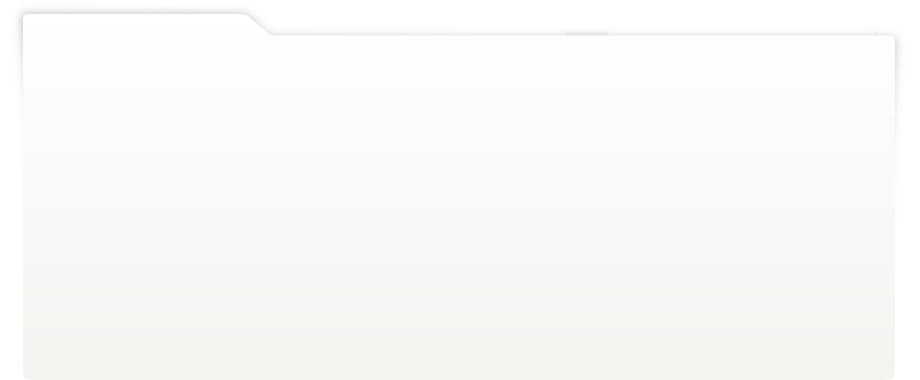
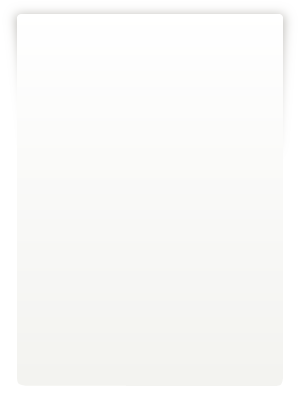
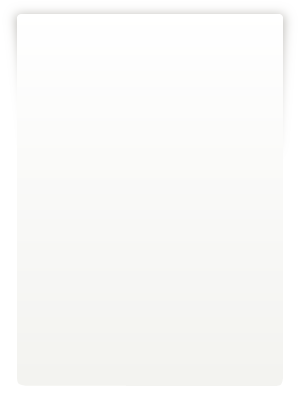
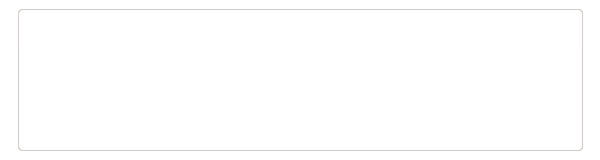
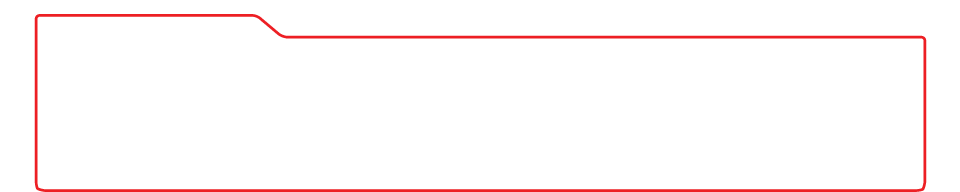
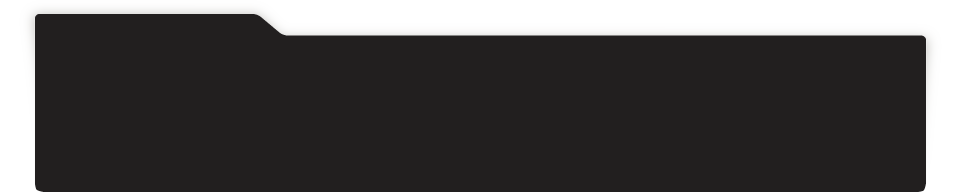
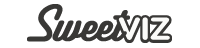
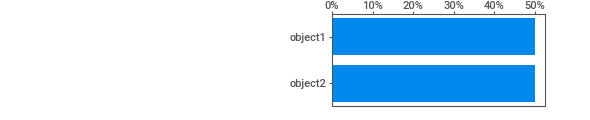
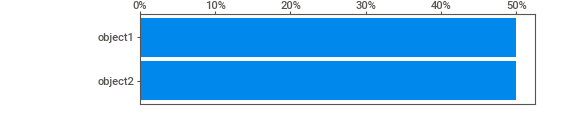
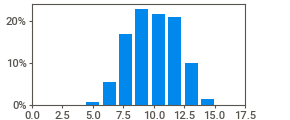
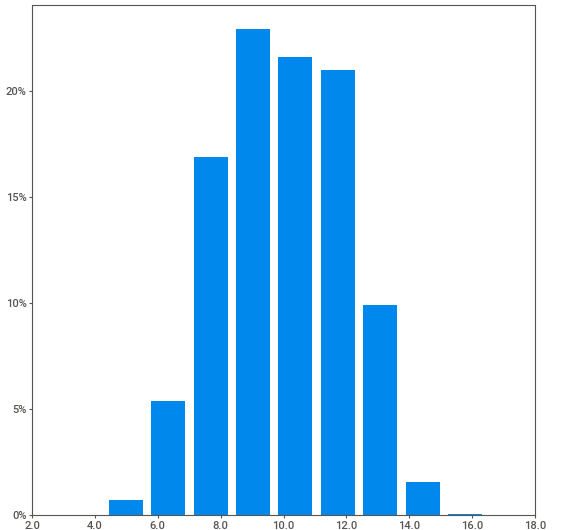
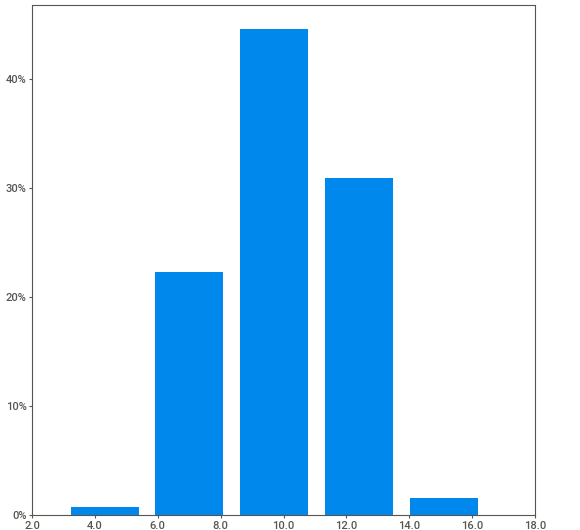
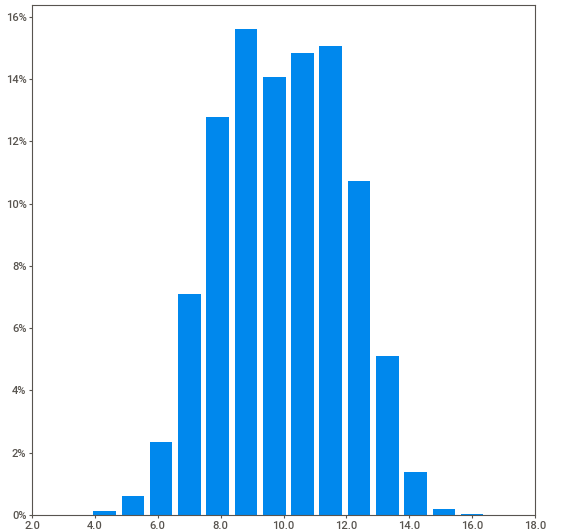
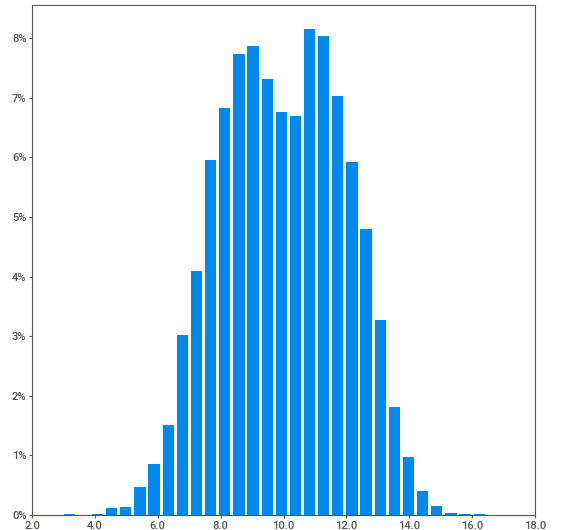
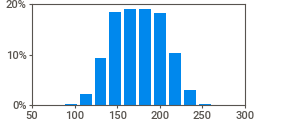
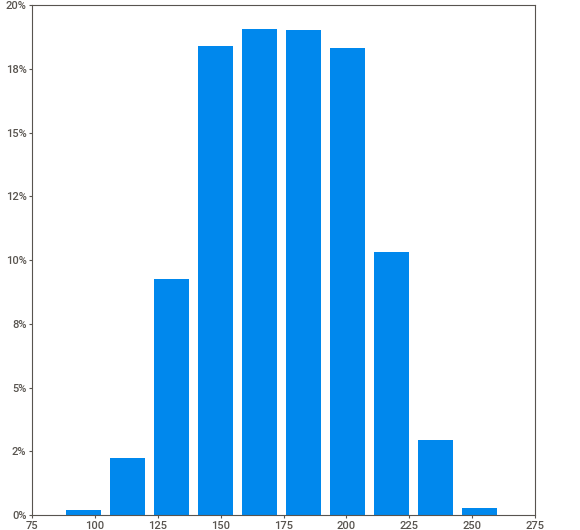
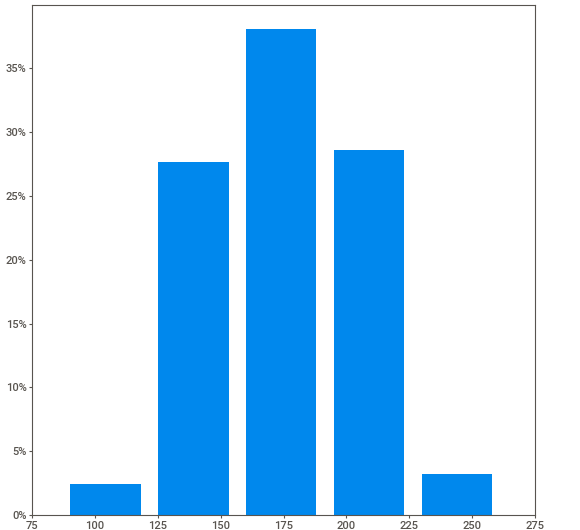
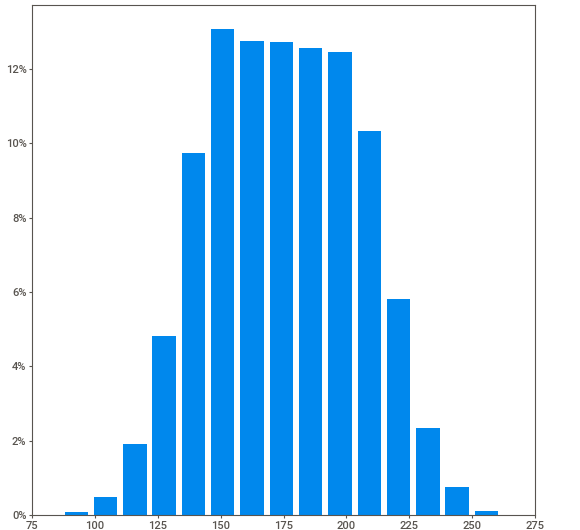
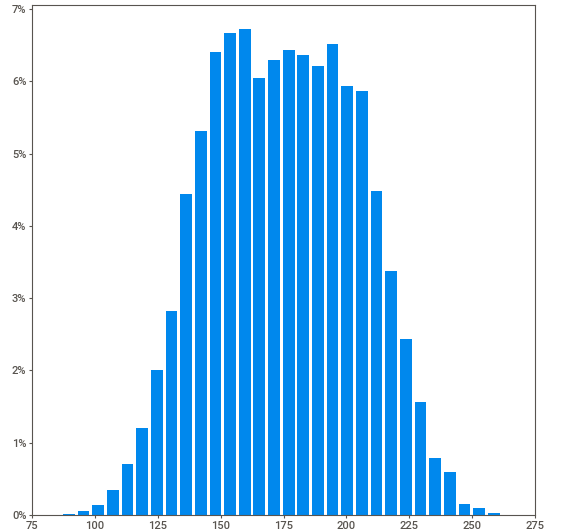
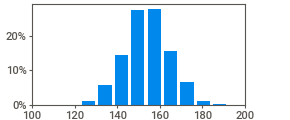
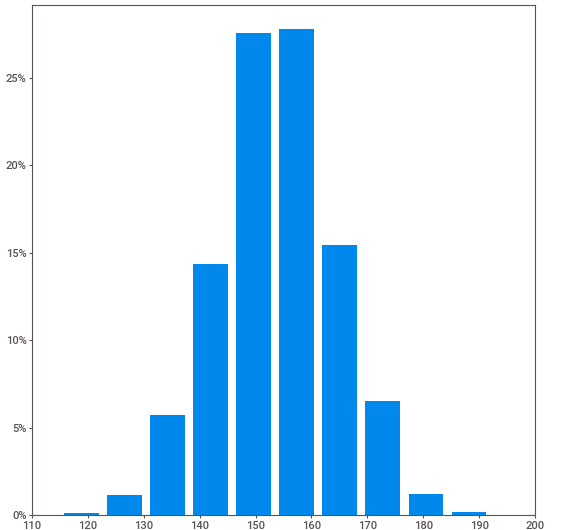
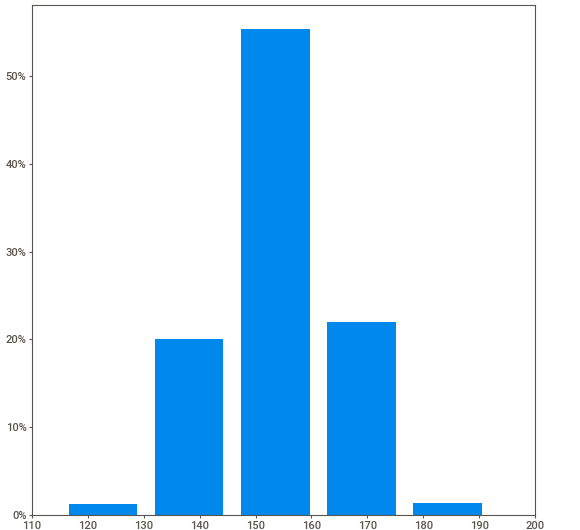
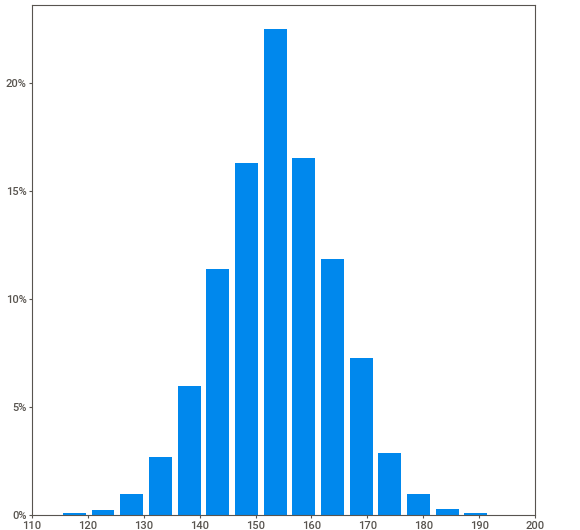
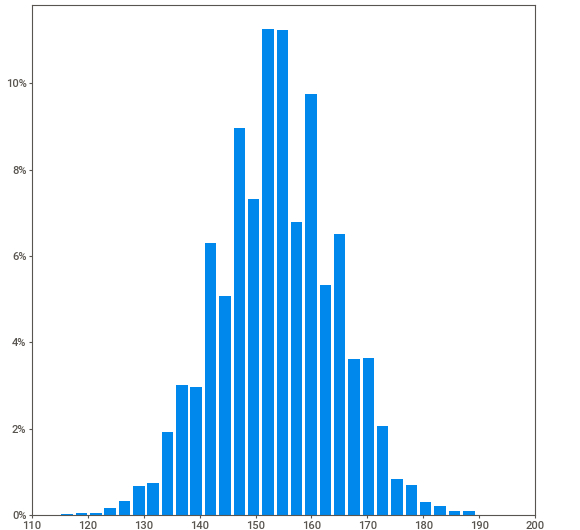
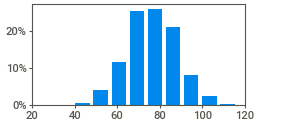
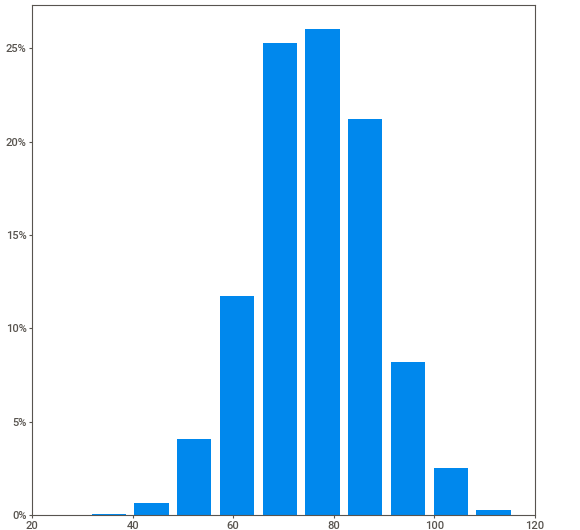
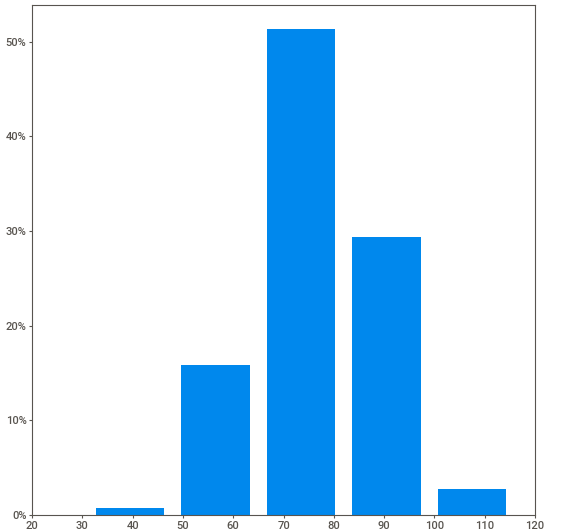
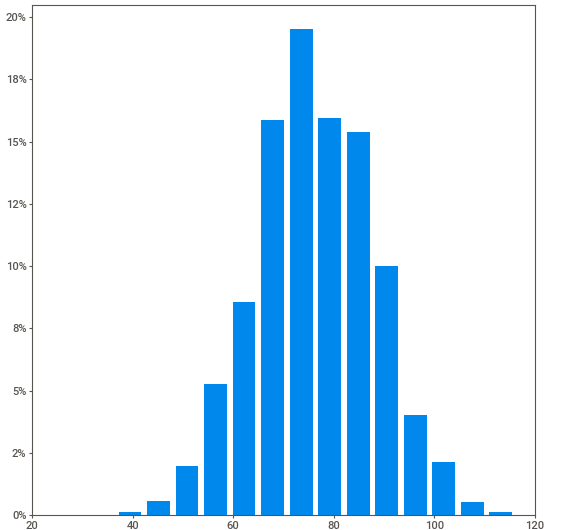
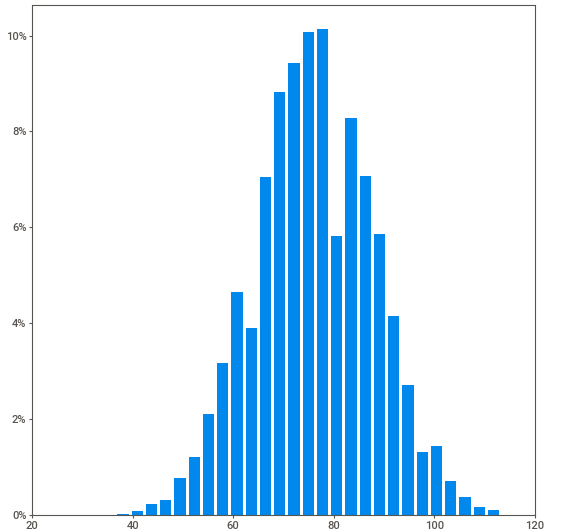
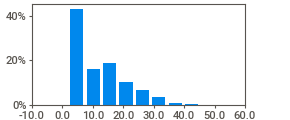
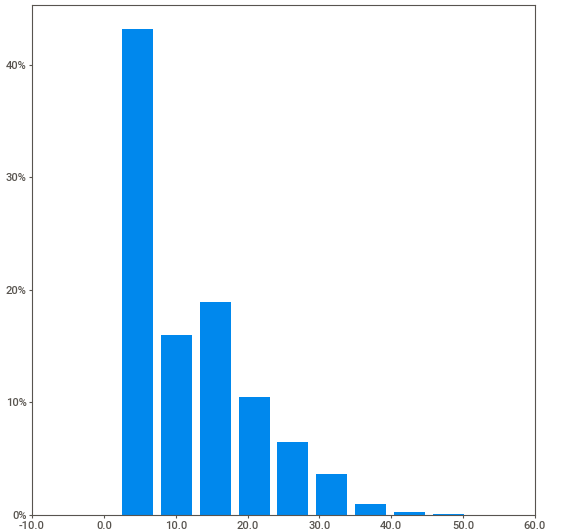
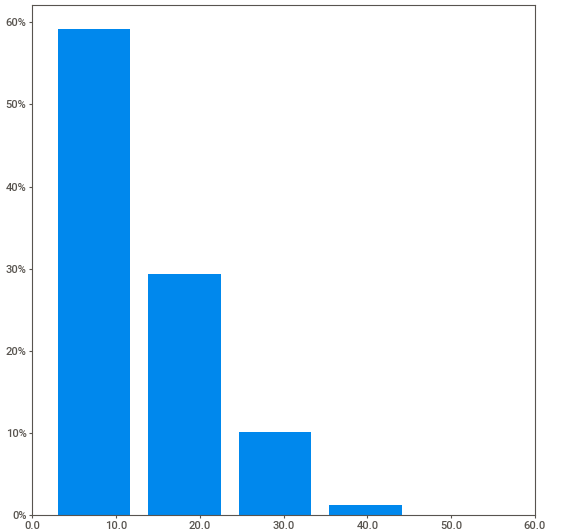
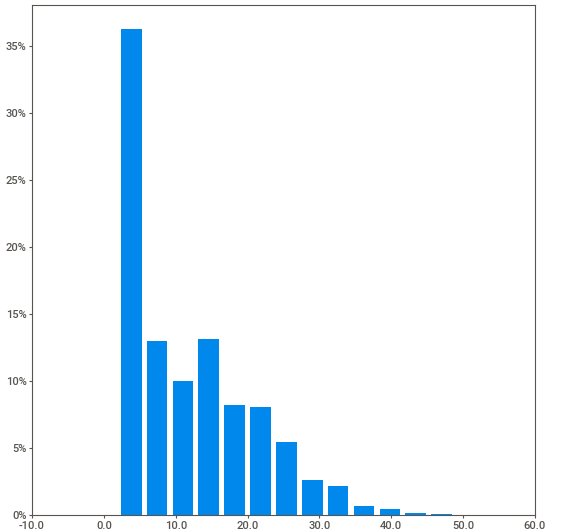
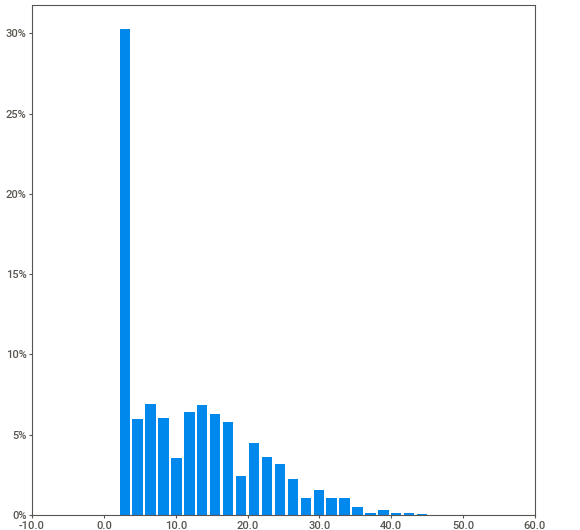
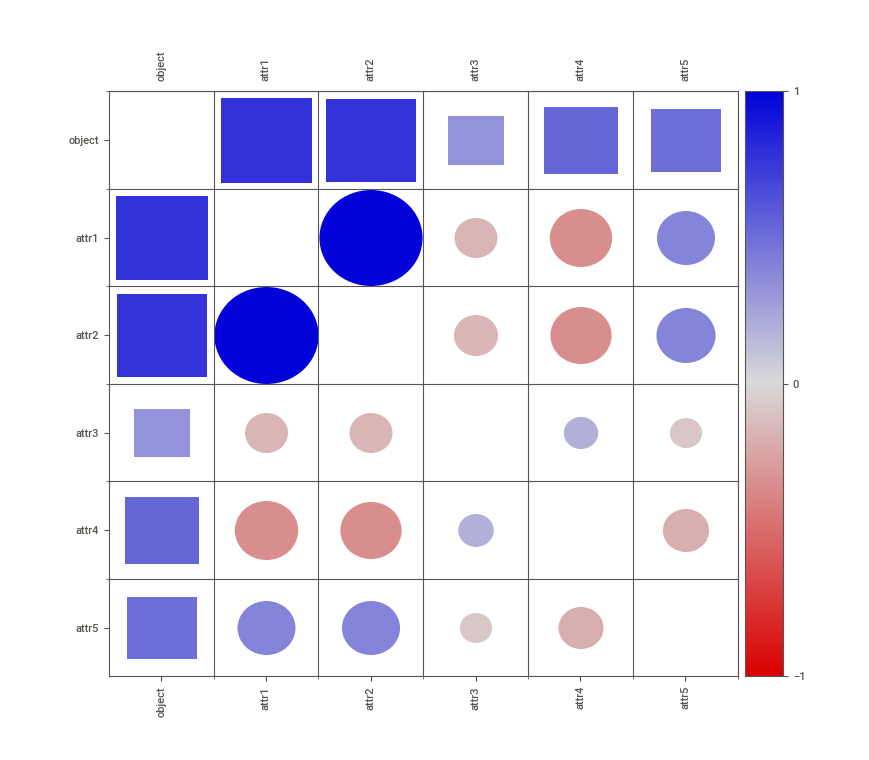
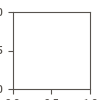

In [14]:
#Display of sweetviz plot
eda_data.show_notebook(layout="vertical",w=900,h=700,scale=0.8)



1.   **The target variable(object) has two class, that is object1 and object 2. Both class have equal representation of 5000 each. Hence with equal balance which does not require balancing before building the model. All the other numerical features, attri1,2,3, and 4 follow a normal distribution except for attri5 which is skewed towards the right.**

2.   **For correlations, we see attri1 and attri2 having a very strong correlation with object. Followed by attri4 and attri5. Variable attri3 has the weak correlation with object.**






###2.2.1.1 Analysis via boxplot

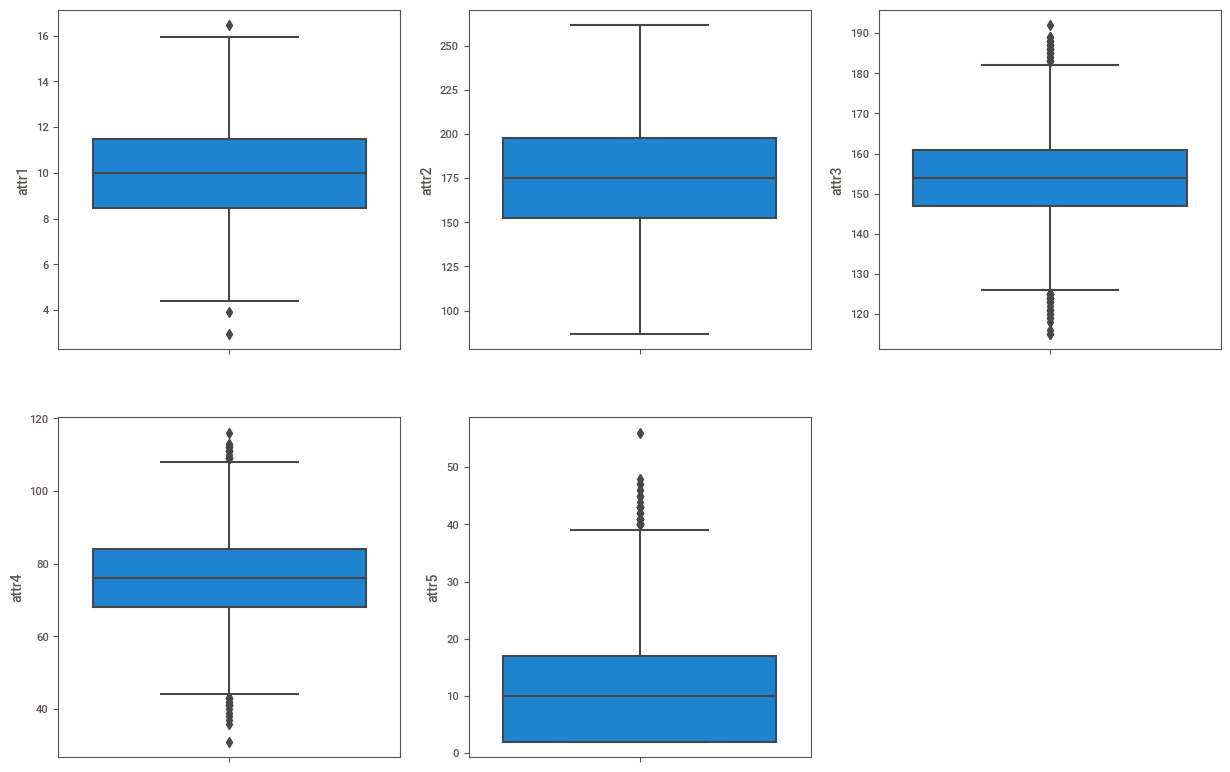

In [15]:
#Boxplot of numerical features for outliers
plt.figure(figsize=(15,15))
plt_num = 1
dataset_num=dataset.columns #separating numerical variables
dataset_num=dataset_num.drop(['object'])  #remove object variable

for column in dataset_num:
  if plt_num <=5:
    plt.subplot(3,3,plt_num)
    sns.boxplot(y=dataset[column])
  plt_num+=1
plt.show()



**We have for attr1, attr3, attr4 and attr5 with outliers except for attr2.**

####2.2.2) Bivariate analysis

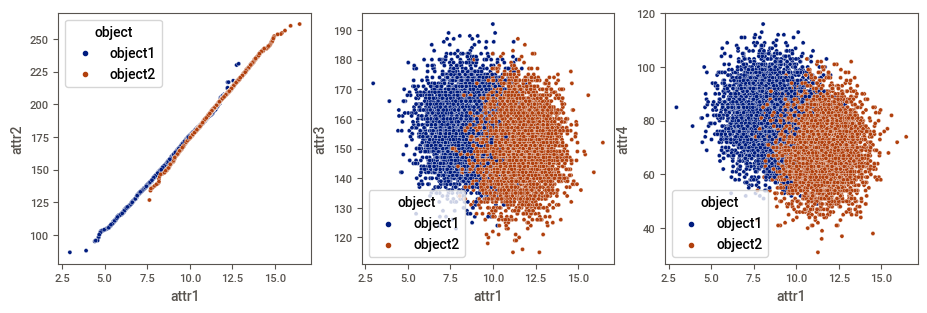

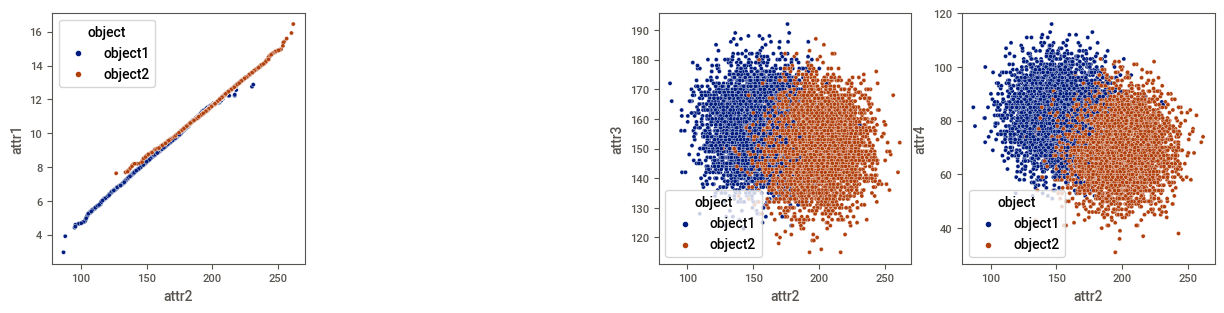

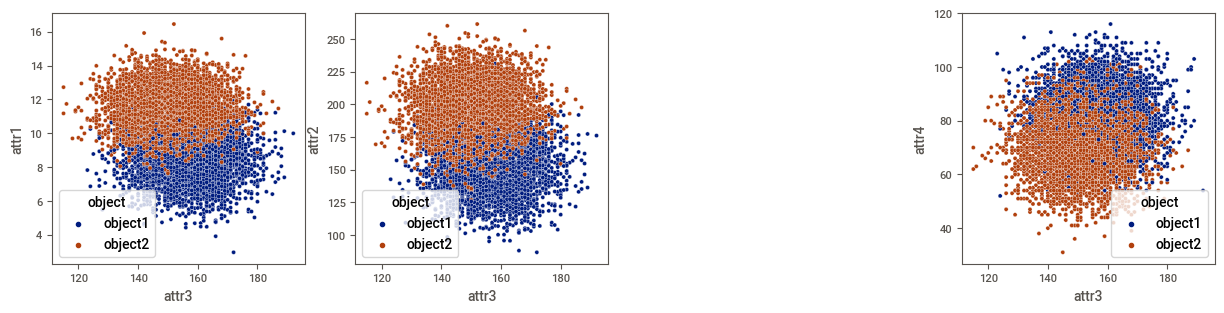

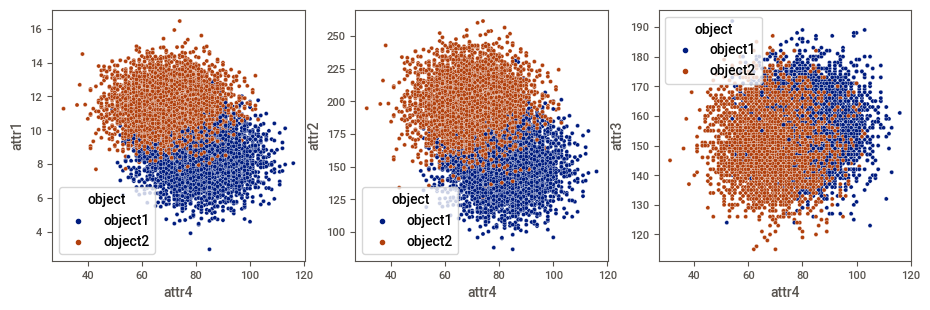

In [16]:
#Scatterplot of features
plt_num1=1


for column1 in dataset_num:
  if plt_num1<=4:
    plt_num2 =1
    plt.figure(figsize=(15,15))
    for column2 in dataset_num:
      if plt_num2<=4:
        if column2 != column1:
          plt.subplot(4,4,plt_num2)
          sns.scatterplot(x=column1, y=column2, data=dataset, hue='object', palette='dark')
      plt_num2+=1
  plt.show()
  plt_num1+=1



1.   **Lower values of attri1 and attri2 can well detect target class object1 whiles higher values for class object2.**
2.   **For attri1 vrs attri3 and attri4, Lower values of attri1 can detect target class object1 whiles higher values for class object2.**


####2.2.3 Multivariate analysis

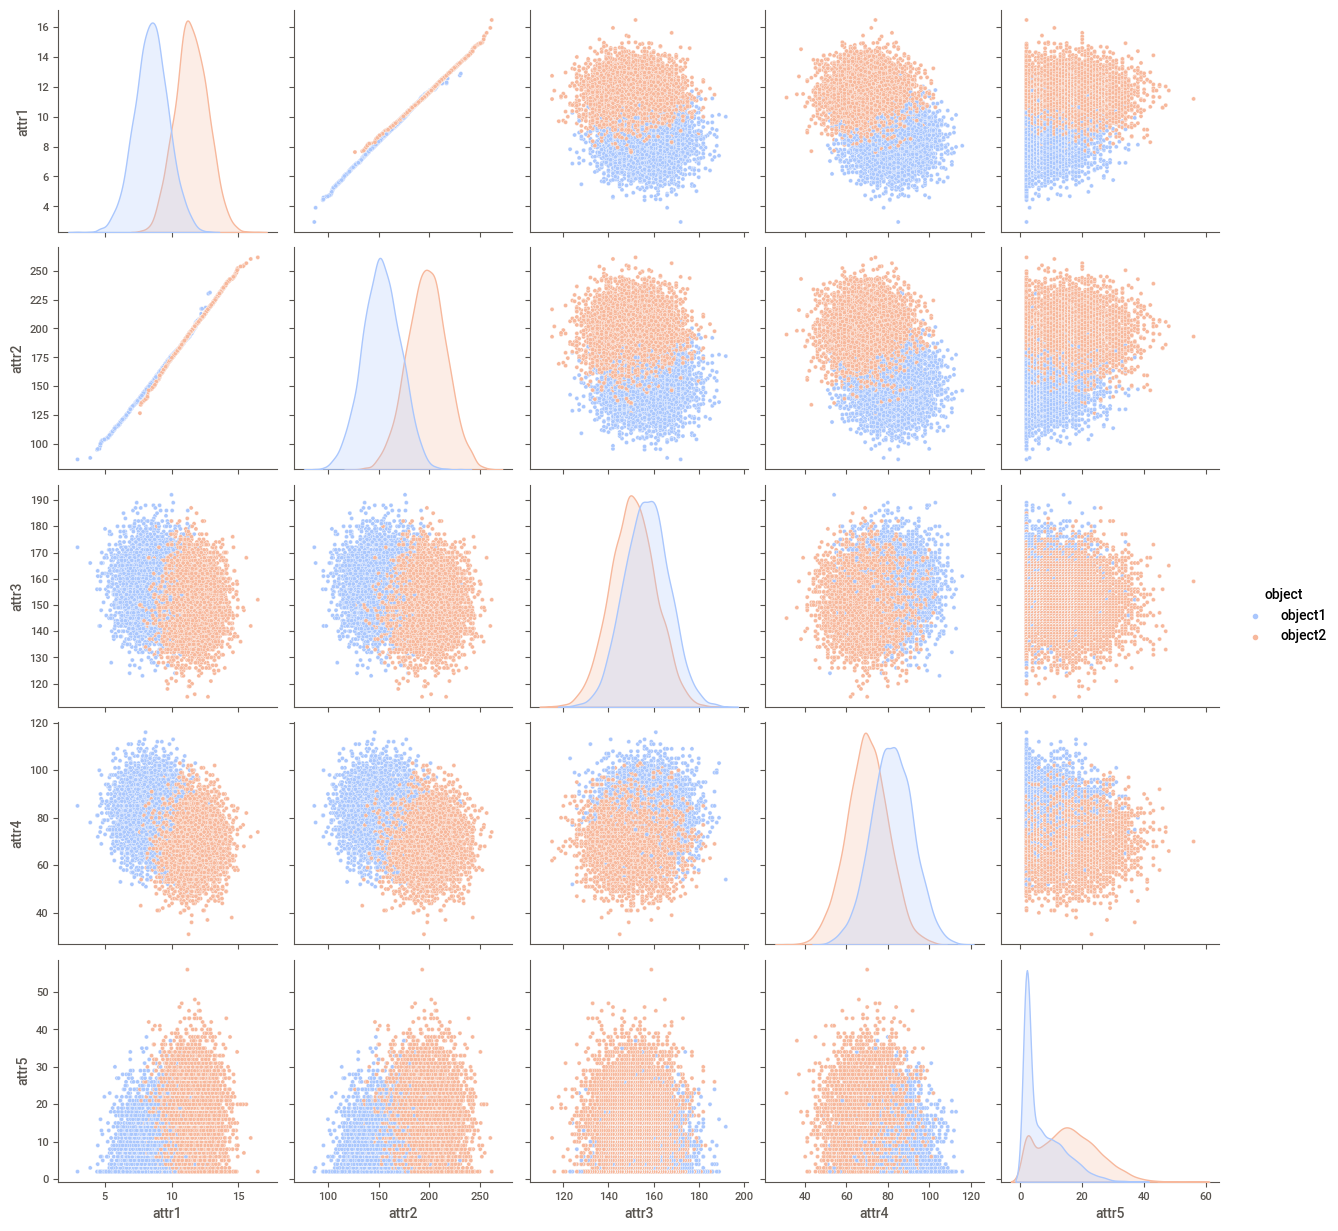

In [17]:
#Pairplot of across features
sns.pairplot(dataset,hue='object',palette='coolwarm')
plt.show()

**This insight is the same as for bivariate analysis above**

##3) Data Pre-Processing

####3.1. Check for duplicate values

In [18]:
print(dataset.duplicated().sum())

0


**The dataset has no duplicates**

####3.2 Check for missing or null dataset

In [19]:
dataset.isnull().sum()

object    0
attr1     0
attr2     0
attr3     0
attr4     0
attr5     0
dtype: int64

**The dataset has no missing data**

###4) Dimensionality Reduction

####4.1 Convert categorical values to numerical values (The Target variable 'object')

In [20]:
#Use of dummies to convert the levels of target column ojbect: object1 to value 0  and object2 to value 1
dataset_object = pd.get_dummies(dataset['object'],prefix='Object',drop_first=True)

In [21]:
#View of the outcome
dataset_object

,Object_object2
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [22]:
#Update dataframe with new numerical values for target
dataset_upd = pd.concat([dataset,dataset_object],axis=1).drop(['object'],axis=1)

In [23]:
#Rename of target variable back to Object
dataset_upd.rename(columns={'Object_object2':'Object'},inplace=True)

In [24]:
#View of the new dataset
dataset_upd

,attr1,attr2,attr3,attr4,attr5,Object
0,10.12,177.38,189,103,2,0
1,8.64,154.75,188,100,2,0
2,9.18,163.56,186,79,2,0
3,10.04,176.54,186,85,2,0
4,11.21,191.90,186,80,2,0
...,...,...,...,...,...,...
9995,10.60,183.14,142,84,46,1
9996,10.76,186.05,140,74,47,1
9997,12.01,205.69,133,76,47,1
9998,11.74,201.98,165,66,48,1


###4.2 Split the dataset

In [25]:
X = dataset_upd.drop(['Object'], axis=1)
Y = dataset_upd['Object']

###4.3 Scale the features

In [26]:
#We standard Scale the dataset due to outliers

from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

#Scale only the independent variables
X_scl = std_scl.fit_transform(X)
X_scl = pd.DataFrame(X_scl, columns = ['attr1','attr2','attr3','attr4','attr5'])

In [27]:
#combining scaled independent variables with dependent variable(Object)
dataset_upd_scl=pd.concat([X_scl.reset_index(drop=True),Y.reset_index(drop=True)], axis=1)
dataset_upd_scl

,attr1,attr2,attr3,attr4,attr5,Object
0,0.074093,0.079738,3.369512,2.305240,-1.033372,0
1,-0.685759,-0.694979,3.273657,2.049002,-1.033372,0
2,-0.408516,-0.393377,3.081947,0.255333,-1.033372,0
3,0.033020,0.050982,3.081947,0.767810,-1.033372,0
4,0.633714,0.576817,3.081947,0.340746,-1.033372,0
...,...,...,...,...,...,...
9995,0.320532,0.276927,-1.135670,0.682397,3.822700,1
9996,0.402678,0.376548,-1.327380,-0.171731,3.933065,1
9997,1.044446,1.048905,-1.998364,-0.000905,3.933065,1
9998,0.905824,0.921897,1.068993,-0.855033,4.043430,1


###5) Feature Selection - Embedded method

####5.1 Tree based(Feature Importance) method

In [28]:
#libraries for feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts



In [29]:
#Train a classifier to select feature importance
X_train_tb, X_test_tb, y_train_tb, y_test_tb = tts(X_scl, Y, test_size=0.2, random_state=9)
tb_model = SelectFromModel(RandomForestClassifier(n_estimators=20, random_state=9))
tb_model.fit(X_train_tb, y_train_tb)


SelectFromModel(estimator=RandomForestClassifier(n_estimators=20,
                                                 random_state=9))

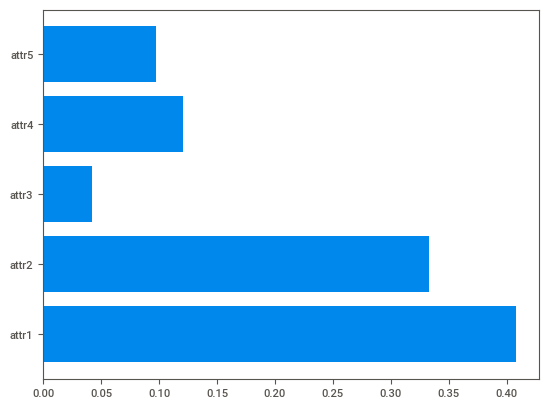

In [30]:
#Plot of feature importance
plt.barh(X_scl.columns, tb_model.estimator_.feature_importances_)
plt.show()

**Base on the feature importance plot we note attr1, attr2, attr4 and attr5 are best expect for attr3. We will model with and without attr3 and choose the best model.**

In [31]:
# We create a dataframe without the feature 'attr3'
X_scl_wog = X_scl.drop('attr3', axis=1)

###5.2 Test-Train split

In [32]:
#Datafram with all feature
X_train, X_test, y_train, y_test = tts(X_scl, Y, test_size=0.2, random_state=9)

#Datafram without the feature 'attr3'
X_train_wog, X_test_wog, y_train_wog, y_test_wog = tts(X_scl_wog, Y, test_size=0.2, random_state=9)

##6) Model creation

**Here we build the model:**

1.   **We consider all features: (X_scl, Y)**
2.   **We consider features without "attri3": (X_scl_wog, Y)**

**NB: Any variable with _wog denotes that it is without feature "attr3"**

###6.1 Random Forest

In [33]:
#Install sklearn (NB:Can be ignored if current version of sklearn already installed)
!pip install scikit-learn

In [34]:
#Importing libraries for builing and evaluating model
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn import metrics


In [35]:
#Variables and values declaration for hyperparameter identification
n_estimators = [int(x) for x in np.linspace(200,2000,10)]
max_features = ['sqrt', 'log2', None]
max_depth = [int(y) for y in np.linspace(start=10, stop=110, num=10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

rand_frst_parm_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}



NB: Execution of the next code will take an estimate of 10minutes

In [36]:
#Hyperparameter Tunning for optimal parameters
#With all features
rand_frst_rfcv = RandomForestClassifier(random_state=9)
rand_frst_cv = RandomizedSearchCV(estimator=rand_frst_rfcv, scoring='f1',
                                  param_distributions=rand_frst_parm_grid,
                                  n_iter=10, n_jobs=-1, verbose=3, cv=3,
                                  random_state=9)

rand_frst_cv.fit(X_train,y_train )
print('Best parameters for all features:', rand_frst_cv.best_params_)


#Without the feature 'attri3'
rand_frst_rfcv_wog = RandomForestClassifier(random_state=9)
rand_frst_cv_wog = RandomizedSearchCV(estimator=rand_frst_rfcv_wog, scoring='f1',
                                  param_distributions=rand_frst_parm_grid,
                                  n_iter=10, n_jobs=-1, verbose=3, cv=3,
                                  random_state=9)

rand_frst_cv_wog.fit(X_train_wog,y_train_wog )
print('Best parameters for with feature (attri3):', rand_frst_cv_wog.best_params_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for all features: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 21, 'bootstrap': True}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for with feature (attri3): {'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}


In [37]:
#Training model with all features
rand_frst_bp = RandomForestClassifier(n_estimators=400, min_samples_split=10 ,
                                      min_samples_leaf=2, max_features='auto',
                                      max_depth=21, bootstrap=True, random_state=9)

rand_frst_bp.fit(X_train, y_train)

y_pred_ran_frst = rand_frst_bp.predict(X_test)

cla_rep_ran_frst = classification_report(y_test, y_pred_ran_frst)
acc_sco_ran_frst = accuracy_score(y_test, y_pred_ran_frst)
f1_sco_ran_frst = f1_score(y_test, y_pred_ran_frst)
pre_sco_ran_frst = precision_score(y_test, y_pred_ran_frst)
rec_sco_ran_frst = recall_score(y_test, y_pred_ran_frst)
print(cla_rep_ran_frst)







              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1021
           1       0.93      0.96      0.94       979

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



In [38]:
#Training model without features 'attri3'
rand_frst_bp_wog = RandomForestClassifier(n_estimators=1400, min_samples_split=5 ,
                                      min_samples_leaf=1, max_features='sqrt',
                                      max_depth=76, bootstrap=False, random_state=9)

rand_frst_bp_wog.fit(X_train_wog, y_train_wog)

y_pred_wog_ran_frst = rand_frst_bp_wog.predict(X_test_wog)

cla_rep_wog_ran_frst = classification_report(y_test_wog, y_pred_wog_ran_frst)
acc_sco_wog_ran_frst = accuracy_score(y_test_wog, y_pred_wog_ran_frst)
f1_sco_wog_ran_frst = f1_score(y_test_wog, y_pred_wog_ran_frst)
pre_sco_wog_ran_frst = precision_score(y_test_wog, y_pred_wog_ran_frst)
rec_sco_wog_ran_frst = recall_score(y_test_wog, y_pred_wog_ran_frst)
print(cla_rep_wog_ran_frst)



              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1021
           1       0.95      0.97      0.96       979

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



###6.2 Artificial Neural Network (ANN)

In [39]:
#Test - Train split with raw data

#With all features
X_train_ann, X_test_ann, y_train_ann, y_test_ann = tts(X_scl, Y, test_size=0.2, random_state=9)

#Dataframe without the feature 'attr3'
X_train_wog_ann, X_test_wog_ann, y_train_wog_ann, y_test_wog_ann = tts(X_scl.drop(['attr3'], axis=1), Y, test_size=0.2, random_state=9)

###Searching for best ANN hyperparameters using Manual Grid Search

In [40]:
#Importing libraries for ANN modelling
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics


In [41]:
#Hyperparameter tunning for ANN
def FunctionFindBestParams(X_train, y_train):

    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 15]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1

            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=5, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


            survivalANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=1)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

###############################################

# Calling the function
ResultsData=FunctionFindBestParams(X_train_ann, y_train_ann)

Epoch 1/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2430 - accuracy: 0.9202
Epoch 2/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1805 - accuracy: 0.9277
Epoch 3/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1787 - accuracy: 0.9280
Epoch 4/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1785 - accuracy: 0.9283
Epoch 5/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1777 - accuracy: 0.9298
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.9297500252723694
Epoch 1/10
1600/1600 [==============================] - 3s 1ms/step - loss: 0.3802 - accuracy: 0.8892
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2506 - accuracy: 0.9275
Epoch 3/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2156 - accuracy: 0.9279
Epoch 4/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1993 - accuracy: 0.9291
Epoch 5/10
1600/16

In [42]:
# Printing the best parameter
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))

  TrialNumber           Parameters  Accuracy
0           3  batch_size5-epoch15     0.937


In [43]:
#Building of input layer, hidden layers and output layer.
classifier = Sequential()

# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=5, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
ObjectANN_Model=classifier.fit(X_train_ann,y_train_ann, batch_size=5 , epochs=15, verbose=1)



Epoch 1/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3749 - accuracy: 0.8891
Epoch 2/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2445 - accuracy: 0.9284
Epoch 3/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2104 - accuracy: 0.9290
Epoch 4/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1964 - accuracy: 0.9299
Epoch 5/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1888 - accuracy: 0.9295
Epoch 6/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1835 - accuracy: 0.9311
Epoch 7/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1787 - accuracy: 0.9301
Epoch 8/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1708 - accuracy: 0.9323
Epoch 9/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1658 - accuracy: 0.9335
Epoch 10/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.159

####Checking model accuracy on Testing Data

In [44]:
# Predictions on testing data
Predictions=classifier.predict(X_test_ann)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=X_test_ann)
TestingData['Object']=y_test_ann
TestingData['PredictedObjectProb']=Predictions

# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return(1)
    else:
        return(0)

# Generating predictions on the testing data by applying probability threshold
TestingData['PredictedObject']=TestingData['PredictedObjectProb'].apply(probThreshold)
print(TestingData.head())

###############################################

print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['Object'], TestingData['PredictedObject']))
acc_sco_ann = accuracy_score(TestingData['Object'], TestingData['PredictedObject'])
f1_sco_ann = f1_score(TestingData['Object'], TestingData['PredictedObject'])
pre_sco_ann = precision_score(TestingData['Object'], TestingData['PredictedObject'])
rec_sco_ann = recall_score(TestingData['Object'], TestingData['PredictedObject'])
print(metrics.confusion_matrix(TestingData['Object'], TestingData['PredictedObject']))

63/63 [==============================] - 0s 896us/step
         attr1     attr2     attr3     attr4     attr5  Object  \
3644 -1.301856 -1.294075  1.644123  0.426159 -0.591911       0   
9184  0.428349  0.412151  1.164848 -0.086318  1.615394       1   
520  -1.040015 -1.040058  0.973138  1.963589 -1.033372       0   
5685 -0.126138 -0.095198  0.493864  1.194874  0.070281       0   
2401 -0.198016 -0.258494 -0.943960 -0.171731 -1.033372       1   

      PredictedObjectProb  PredictedObject  
3644             0.000270                0  
9184             0.969792                1  
520              0.000101                0  
5685             0.038731                0  
2401             0.488797                0  

######### Testing Accuracy Results #########
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1021
           1       0.93      0.97      0.95       979

    accuracy                           0.95      2000
   macro avg  

####Dataframe without the feature 'attri3'

In [45]:
def FunctionFindBestParams(X_train, y_train):

    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 15]

    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])

    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1

            # Creating the classifier ANN model
            classifier2 = Sequential()
            classifier2.add(Dense(units=10, input_dim=4, kernel_initializer='uniform', activation='relu'))
            classifier2.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier2.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


            survivalANN_Model=classifier2.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=1)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]

            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)

            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

###############################################

# Calling the function
ResultsData2=FunctionFindBestParams(X_train_wog_ann,y_train_wog_ann)

Epoch 1/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2618 - accuracy: 0.9005
Epoch 2/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1895 - accuracy: 0.9234
Epoch 3/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1884 - accuracy: 0.9235
Epoch 4/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1874 - accuracy: 0.9233
Epoch 5/5
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1864 - accuracy: 0.9244
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.9243749976158142
Epoch 1/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2470 - accuracy: 0.9099
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1894 - accuracy: 0.9226
Epoch 3/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1879 - accuracy: 0.9235
Epoch 4/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1870 - accuracy: 0.9250
Epoch 5/10
1600/16

In [46]:
# Printing the best parameter
print(ResultsData2.sort_values(by='Accuracy', ascending=False).head(1))

  TrialNumber           Parameters  Accuracy
0           2  batch_size5-epoch10  0.929125


In [47]:
#Datafram without the feature 'attri3'

classifier2 = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier2.add(Dense(units=10, input_dim=4, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier2.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier2.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fitting the Neural Network on the training data
ObjectANN_Model2=classifier2.fit(X_train_wog_ann,y_train_wog_ann, batch_size=5 , epochs=15, verbose=1)



Epoch 1/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.2558 - accuracy: 0.9100
Epoch 2/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1895 - accuracy: 0.9222
Epoch 3/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1886 - accuracy: 0.9234
Epoch 4/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1876 - accuracy: 0.9246
Epoch 5/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1863 - accuracy: 0.9240
Epoch 6/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1860 - accuracy: 0.9235
Epoch 7/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1847 - accuracy: 0.9237
Epoch 8/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1837 - accuracy: 0.9265
Epoch 9/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.1828 - accuracy: 0.9243
Epoch 10/15
1600/1600 [==============================] - 2s 1ms/step - loss: 0.181

In [48]:
# Predictions on testing data
Predictions=classifier2.predict(X_test_wog_ann)

# Generating a data frame for analyzing the test data
TestingData2=pd.DataFrame(data=X_test_wog_ann)
TestingData2['Object']=y_test_wog_ann
TestingData2['PredictedObjectProb']=Predictions

# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return(1)
    else:
        return(0)

# Generating predictions on the testing data by applying probability threshold
TestingData2['PredictedObject']=TestingData2['PredictedObjectProb'].apply(probThreshold)
print(TestingData2.head())

###############################################
from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData2['Object'], TestingData2['PredictedObject']))
acc_sco_wog_ann = accuracy_score(TestingData2['Object'], TestingData2['PredictedObject'])
f1_sco_wog_ann = f1_score(TestingData2['Object'], TestingData2['PredictedObject'])
pre_sco_wog_ann = precision_score(TestingData2['Object'], TestingData2['PredictedObject'])
rec_sco_wog_ann = recall_score(TestingData2['Object'], TestingData2['PredictedObject'])
print(metrics.confusion_matrix(TestingData2['Object'], TestingData2['PredictedObject']))

63/63 [==============================] - 0s 969us/step
         attr1     attr2     attr4     attr5  Object  PredictedObjectProb  \
3644 -1.301856 -1.294075  0.426159 -0.591911       0             0.002105   
9184  0.428349  0.412151 -0.086318  1.615394       1             0.968516   
520  -1.040015 -1.040058  1.963589 -1.033372       0             0.000776   
5685 -0.126138 -0.095198  1.194874  0.070281       0             0.071130   
2401 -0.198016 -0.258494 -0.171731 -1.033372       1             0.112963   

      PredictedObject  
3644                0  
9184                1  
520                 0  
5685                0  
2401                0  

######### Testing Accuracy Results #########
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1021
           1       0.93      0.91      0.92       979

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0

##7) Model Comparison and Evaluation

In [49]:
dataset_metrics = {
    "Model" : ["Random Forest(All features)","Random Forest(Without feature attr3)",
    "ANN(All features)","ANN(Without feature attr3)"],
    "Accuracy" : [acc_sco_ran_frst, acc_sco_wog_ran_frst, acc_sco_ann, acc_sco_wog_ann],
    "F1-Score" : [f1_sco_ran_frst, f1_sco_wog_ran_frst, f1_sco_ann, f1_sco_wog_ann],
    "Precision" : [pre_sco_ran_frst, pre_sco_wog_ran_frst, pre_sco_ann, pre_sco_wog_ann],
    "Recall" : [rec_sco_ran_frst, rec_sco_wog_ran_frst, rec_sco_ann, rec_sco_wog_ann]
}

In [50]:
dataset_metrics_df=pd.DataFrame(dataset_metrics)
dataset_metrics_df.set_index('Model', inplace=True)
dataset_metrics_df=(dataset_metrics_df*100).round(2)
dataset_metrics_df["Average"] = ((dataset_metrics_df["Accuracy"]+dataset_metrics_df["F1-Score"]+dataset_metrics_df["Precision"]+dataset_metrics_df["Recall"])/4).round(2)


In [51]:
dataset_metrics_df

,Accuracy,F1-Score,Precision,Recall,Average
Model,,,,,
Random Forest(All features),94.40,94.35,93.22,95.51,94.37
Random Forest(Without feature attr3),95.90,95.84,95.17,96.53,95.86
ANN(All features),95.05,95.07,92.80,97.45,95.09
ANN(Without feature attr3),92.55,92.30,93.41,91.22,92.37


##8) Conclusion

**NB: The performance measures will quite differentiate from displayed above due to randomness of these models**

##Based on the  various average model's performance and evaluation metrics above we rank the best models below :
1. **Random Forest(Without feature attr3)**
2. **ANN(All features)**
3. **Random Forest(All features)**
4. **ANN(Without feature attr3)**


